# Exploring Movie Data

Exploring and visualizing movie data scraped from Box Office Mojo. Make sure to format your plots properly with axis labels and graph titles at the very least.

-------

 ### Data Prep
 
- Import in the standard libraries (NumPy, pandas, matplotlib)
- Read in the CSV
- Explore the data set, the columns and the types

In [12]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
movies = pd.read_csv("2013_movies.csv")
movies.describe()
movies.head()
movies.tail()


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
95,Rush,38000000.0,26947624,Ron Howard,R,123,2013-09-20 00:00:00
96,The Host,40000000.0,26627201,Andrew Niccol,PG-13,125,2013-03-29 00:00:00
97,The World's End,20000000.0,26004851,Edgar Wright,R,109,2013-08-23 00:00:00
98,21 and Over,13000000.0,25682380,Jon LucasScott Moore,R,93,2013-03-01 00:00:00
99,Her,23000000.0,25568251,Spike Jonze,R,120,2013-12-18 00:00:00


### Exercise 1 
 
- Plot Domestic Total Gross over Time.
- Try a scatterplot and a line plot.

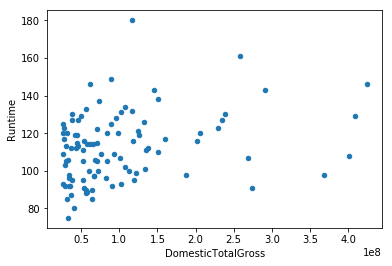

In [13]:
df = pd.DataFrame(movies)
df.plot.scatter(x='DomesticTotalGross', y='Runtime');

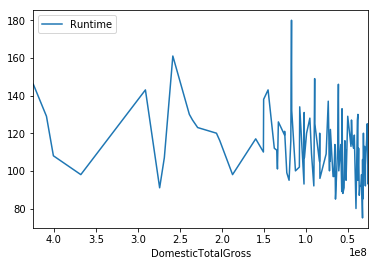

In [14]:
df.plot.line(x='DomesticTotalGross', y='Runtime');

### Exercise 2

- Plot Runtime vs. Domestic Total Gross. 
- Try a scatterplot and a line plot.

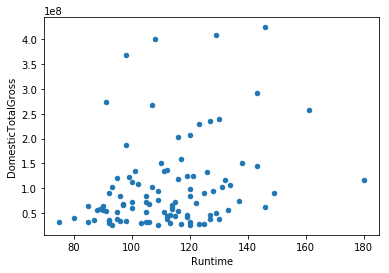

In [15]:
df.plot.scatter(x='Runtime', y='DomesticTotalGross');

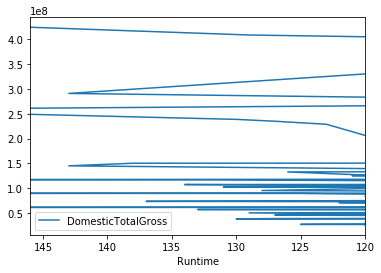

In [16]:
df.plot.line(x='Runtime', y='DomesticTotalGross');

### Exercise 3

- Group your data by Rating.
- Find the average runtime and domestic total gross at each level of Rating.

In [21]:
group_by_rating = df.groupby('Rating')['Runtime','DomesticTotalGross'].mean()
print(group_by_rating)

           Runtime  DomesticTotalGross
Rating                                
G       107.000000        2.684928e+08
PG       99.933333        1.311357e+08
PG-13   117.510638        1.114498e+08
R       110.729730        6.989243e+07


### Exercise 4

- Plot Release Date by Domestic Total Gross. Segment by Rating.
- Have all 4 groups on one plot.
- Have 4 separate plots, but part of the same matplotlib figure.

//anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


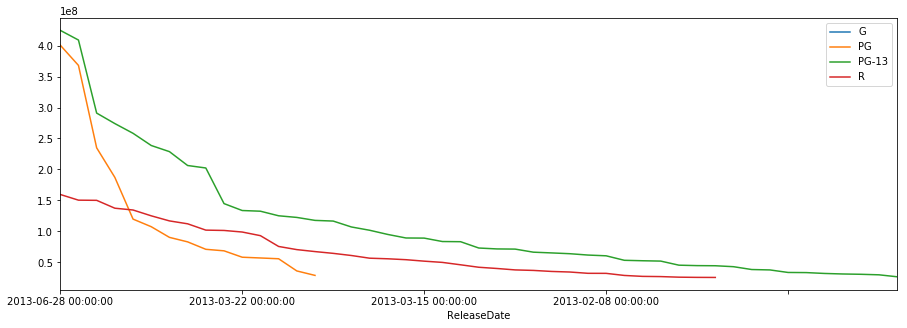

In [31]:
fig = plt.figure(figsize=(15,5))
ax = plt.gca()
labels = []
for name, group in df.groupby('Rating'):
    group.plot(x='ReleaseDate', y='DomesticTotalGross', label = name, ax=ax)
    labels.append(name)

    

plt.legend(labels, loc= 'best')

//anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


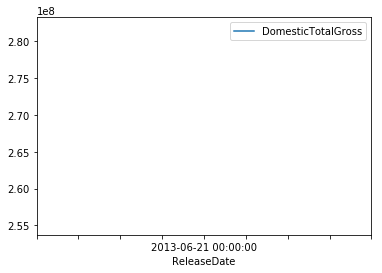

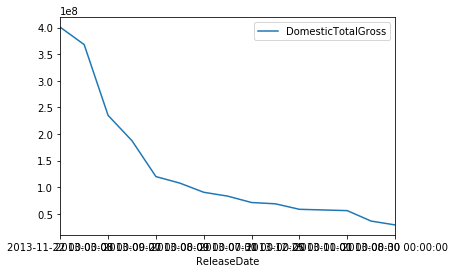

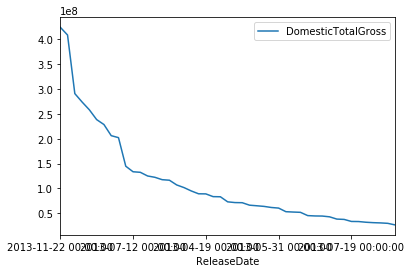

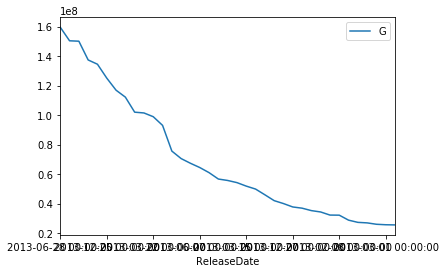

In [38]:

labels = []
for name, group in df.groupby('Rating'):
    group.plot(x='ReleaseDate', y='DomesticTotalGross')
    labels.append(name)

    

plt.legend(labels, loc= 'best')

### Exercise 5

- What director in your dataset has the highest gross per movie (highest avg gross)?
- Find the top 3 directors with the highest average gross with "one-hit-wonders" removed.

In [40]:
group_by_director = df.groupby('Director')['DomesticTotalGross']
highest_per_mv = group_by_director.agg([np.count_nonzero,np.mean]).sort_values(by='mean', ascending=False)
highest_per_mv.head()


,count_nonzero,mean
Director,,
Francis Lawrence,1,424668047
Shane Black,1,409013994
Chris BuckJennifer Lee,1,400738009
Pierre CoffinChris Renaud,1,368061265
Zack Snyder,1,291045518


In [48]:
multiple_mv = highest_per_mv[highest_per_mv['count_nonzero']>1].sort_values(by='mean', ascending=False)
multiple_mv.head()

,count_nonzero,mean
Director,,
James Wan,2,110493294
Tyler Perry,2,52259354
Malcolm D. Lee,2,51270491


### Exercise 6

- Bin the dataset into months and make a bar graph with error bars of gross each year

In [51]:
df['month'] = pd.DatetimeIndex(df['ReleaseDate']).month
print(df[:5])

                             Title       Budget  DomesticTotalGross  \
0  The Hunger Games: Catching Fire  130000000.0           424668047   
1                       Iron Man 3  200000000.0           409013994   
2                           Frozen  150000000.0           400738009   
3                  Despicable Me 2   76000000.0           368061265   
4                     Man of Steel  225000000.0           291045518   

                    Director Rating  Runtime          ReleaseDate  month  
0           Francis Lawrence  PG-13      146  2013-11-22 00:00:00     11  
1                Shane Black  PG-13      129  2013-05-03 00:00:00      5  
2     Chris BuckJennifer Lee     PG      108  2013-11-22 00:00:00     11  
3  Pierre CoffinChris Renaud     PG       98  2013-07-03 00:00:00      7  
4                Zack Snyder  PG-13      143  2013-06-14 00:00:00      6  


In [52]:

mth_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
def f(x):
    monthlabel = mth_dict[x]
    return monthlabel

df['monthlabel']=df['month'].apply(f)
print(df.head())


                             Title       Budget  DomesticTotalGross  \
0  The Hunger Games: Catching Fire  130000000.0           424668047   
1                       Iron Man 3  200000000.0           409013994   
2                           Frozen  150000000.0           400738009   
3                  Despicable Me 2   76000000.0           368061265   
4                     Man of Steel  225000000.0           291045518   

                    Director Rating  Runtime          ReleaseDate  month  \
0           Francis Lawrence  PG-13      146  2013-11-22 00:00:00     11   
1                Shane Black  PG-13      129  2013-05-03 00:00:00      5   
2     Chris BuckJennifer Lee     PG      108  2013-11-22 00:00:00     11   
3  Pierre CoffinChris Renaud     PG       98  2013-07-03 00:00:00      7   
4                Zack Snyder  PG-13      143  2013-06-14 00:00:00      6   

  monthlabel  
0        Nov  
1        May  
2        Nov  
3       July  
4       June  


In [53]:
import math
ygrouped = df.groupby(df['month'])
month_means = ygrouped['DomesticTotalGross'].agg({
    'count':'count','mean':'mean', 'sum':'sum', 'std':'std','sem':lambda x:np.std(x, ddof=1)/math.sqrt(len(x))
    
})
print(month_means)

       count       mean         sum           std       sem
month                                                      
1          5   49543237   247716186  1.465947e+07   6555914
2          7   67386013   471702096  3.283185e+07  12409272
3          9   96097096   864873866  7.323942e+07  24413138
4          6   60940719   365644317  2.530104e+07  10329105
5          8  177409720  1419277764  1.117754e+08  39518588
6          8  150650005  1205200046  9.519994e+07  33658260
7         12  105780721  1269368663  9.140837e+07  26387322
8         11   68531263   753843894  4.132232e+07  12459149
9          6   61712314   370273886  3.482327e+07  14216539
10         5  115027038   575135191  9.394330e+07  42012719
11        10  137936759  1379367599  1.536011e+08  48572933
12        13   87483385  1137284014  6.683825e+07  18537593


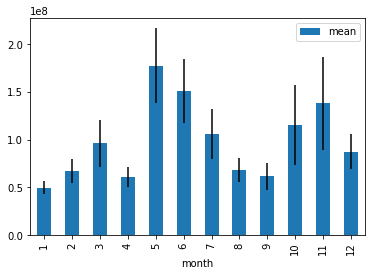

In [57]:
month_means.plot(y='mean',kind = 'bar',yerr=month_means['sem'])